# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


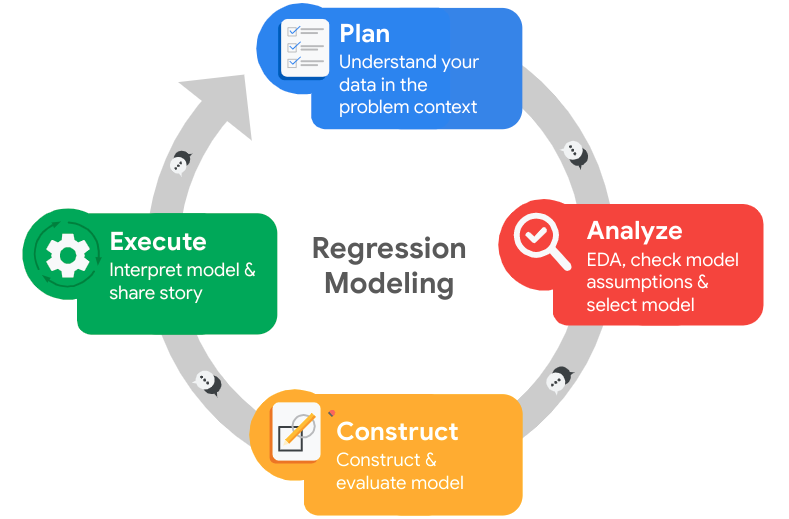

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders: Senior managment.

Goal: Predict whether or not employees leave based on various survey data.

Initial Obs.: Some of these variables have linear relationships.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [35]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
columns = df0.columns
print(columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [6]:
# Rename columns as needed
df0.columns = df0.columns.str.lower().str.replace(' ', '_')
columns = df0.columns

# Display all column names after the update
print(columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
duplicates = df0.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3008


In [9]:
# Inspect some rows containing duplicates as needed
sorted_duplicates = df0[df0.duplicated()].sort_values(by=list(df0.columns))
sorted_duplicates.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low
14688,0.09,0.79,6,275,4,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates().copy()


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

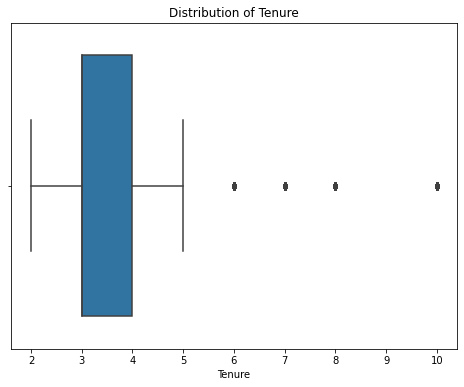

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='time_spend_company', data=df1)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.show()

In [12]:
# Determine the number of rows containing outliers

# Calculate the interquartile range (IQR)
Q1 = df1['time_spend_company'].quantile(0.25)
Q3 = df1['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the whiskers
outliers = df1[(df1['time_spend_company'] < lower_bound) | (df1['time_spend_company'] > upper_bound)]

# Calculate the number of rows containing outliers
num_outliers = len(outliers)

print(f"Number of rows containing outliers: {num_outliers}")

Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




The variables have varying relationships.

The data is distributed normally with some outliers.

Removed dupes and nulls. Converted categorical to numerical. Removed outliers. This was done to ensure a uniform dataset that reads well when fed to a model.

EDA is important to avoid issues with training the model and its subsequent results.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
value_counts = df1['left'].value_counts()
stayed = value_counts[0]
left = value_counts[1]

print("Number of employees who stayed:", stayed)
print("Number of employees who left:", left)

Number of employees who stayed: 10000
Number of employees who left: 1991


In [14]:
# Get percentages of people who left vs. stayed

# Calculate the total number of employees
total_employees = stayed + left

# Calculate the percentages
percent_stayed = (stayed / total_employees) * 100
percent_left = (left / total_employees) * 100

print("Percentage of employees who stayed: {:.2f}%".format(percent_stayed))
print("Percentage of employees who left: {:.2f}%".format(percent_left))

Percentage of employees who stayed: 83.40%
Percentage of employees who left: 16.60%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

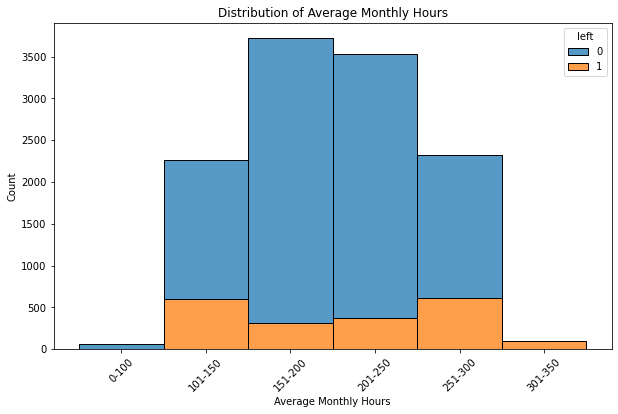

In [15]:
# Create a plot as needed
# Plot 1: Histogram of Average Monthly Hours Range vs. Left

# Create a copy of df1 called df_visual to use for visualizations to maintain df1's original form for modeling.
df_visual = df1.copy()

# Define the ranges for average monthly hours
hour_ranges = [0, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]

# Create labels for the hour ranges
hour_labels = ['0-100', '101-150', '151-200', '201-250', '251-300', 
               '301-350', '351-400', '401-450', '451-500', '501-550']

# Categorize the average monthly hours into ranges
df_visual['hour_range'] = pd.cut(df_visual['average_montly_hours'], bins=hour_ranges, labels=hour_labels)

# Plot a histogram of the categorized average monthly hours
plt.figure(figsize=(10, 6))
sns.histplot(x='hour_range', data=df_visual, hue='left', multiple='stack')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.title('Distribution of Average Monthly Hours')
plt.xticks(rotation=45)
plt.show()

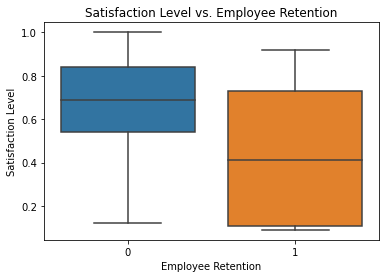

In [16]:
# Create a plot as needed
# Plot 2: Box Plot of Satisfaction Level vs. Employee Retention
sns.boxplot(x='left', y='satisfaction_level', data=df_visual)
plt.xlabel('Employee Retention')
plt.ylabel('Satisfaction Level')
plt.title('Satisfaction Level vs. Employee Retention')
plt.show()

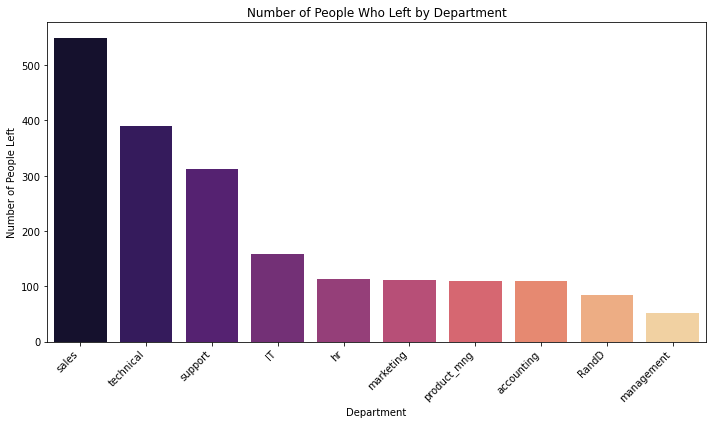

In [17]:
# Create a plot as needed
# Plot 3: Bar Plot of Employee's Who Left by Department
left_by_department = df_visual[df_visual['left'] == 1]['department'].value_counts()

# Plot a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=left_by_department.index, y=left_by_department.values, palette='magma')
plt.xlabel('Department')
plt.ylabel('Number of People Left')
plt.title('Number of People Who Left by Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

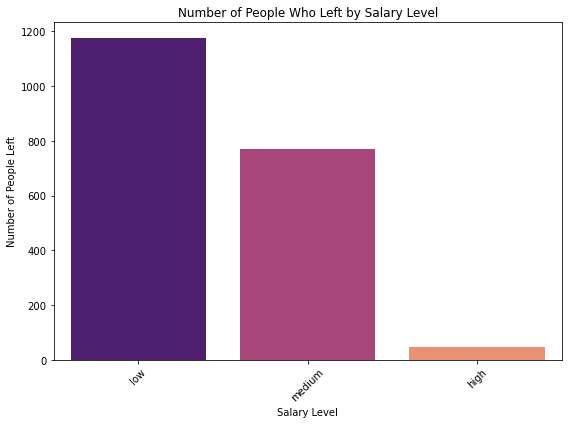

In [18]:
# Create a plot as needed
# Plot 4: Count Plot of Work Accidents vs. Employee Retention
# Count the number of people who left by salary level
left_by_salary = df_visual[df_visual['left'] == 1]['salary'].value_counts()

# Plot a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=left_by_salary.index, y=left_by_salary.values, palette='magma')
plt.xlabel('Salary Level')
plt.ylabel('Number of People Left')
plt.title('Number of People Who Left by Salary Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

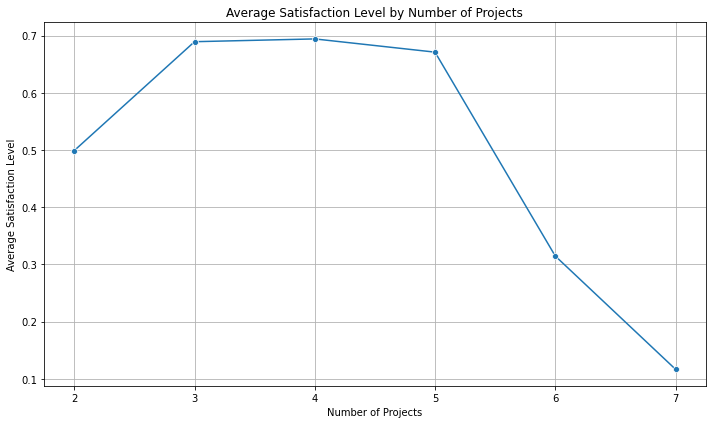

In [19]:
# Create a plot as needed
# Plot 5: Line Graph of Satisfaction Level vs # of Projects

# Calculate the average satisfaction level for each number of projects
avg_satisfaction_per_project = df_visual.groupby('number_project')['satisfaction_level'].mean().reset_index()

# Plot a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='number_project', y='satisfaction_level', data=avg_satisfaction_per_project, marker='o')
plt.xlabel('Number of Projects')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Number of Projects')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights

Plot 1: For the most part it can be concluded that the more hours an individual works in a month the more likely they are to leave.

Plot 2: The satisfaction level range between people who left and who stayed differ in size and inherent value. The people that left are in a range between .1 and .7, whereas the people who stayed are in a range of ~.55 and ~.85.

Plot 3: The departments play a part in whether or not someones leaves. This visualization provides insight that if it is a less technical role people are more likely to leave as opposed to the specialized technical roles.

Plot 4: Salary is naturally another driving factor as to whether employees stay or leave, as we see above people that get highly compensated are less likely to leave.

Plot 5: The number of projects an employee contributes to also plays a role in whether or not an employee is satisfied, as we see in the visual we see that as the number of projects increase the more likely their satisfaction is to decrease.

### Data Final Set-Up

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [21]:
# Convert 'Department' and 'Salary' to numerical.
# Create a copy of the original dataframe
df_final = df1.copy()

# One-Hot Encoding for Department
df_final = pd.get_dummies(df_final, columns=['department'], prefix='dept')

# Initialize the LabelEncoder for salary
le = LabelEncoder()

# Apply label encoding to the salary column
df_final['salary'] = le.fit_transform(df_final['salary'])

In [22]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



For this model I intend to use all features and then impose dimensionality reduction and scoring metrics to assess which features are best before I begin the optimization process. 

Each assumption is not met for example the data is very unbalanced in favor of those who stayed.

The model fits the data extremely well based on the cross validation score and its extremely low standard deviation.

The improvements could be in trying different ensemble learning methods and tuning.


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification problem.

### Identify the types of models most appropriate for this task.

- Logistic Regression
- Decision Trees

If not sufficient enough...

- Random Forests
- Gradient Boosting Machines

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Logistic Regression

In [23]:
# Define the feature set and target variable
X = df_final.drop(columns=['left'])
y = df_final['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_model.predict(X_test)

# Will Need For Later...
y_probs_logreg = log_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8368912608405604
Confusion Matrix:
 [[2413   88]
 [ 401   96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2501
           1       0.52      0.19      0.28       497

    accuracy                           0.84      2998
   macro avg       0.69      0.58      0.59      2998
weighted avg       0.80      0.84      0.80      2998



#### Decision Tree Classifier

In [24]:
# Initialize and train the logistic regression model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.966310873915944
Confusion Matrix:
 [[2443   58]
 [  43  454]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2501
           1       0.89      0.91      0.90       497

    accuracy                           0.97      2998
   macro avg       0.93      0.95      0.94      2998
weighted avg       0.97      0.97      0.97      2998



### Model Refinement

***We will be working with the Decision Tree model based on its higher accuracy score***

Feature selection and model tuning. 

In [25]:
# Analyze feature contribution
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

                  Feature  Importance
0      satisfaction_level    0.377054
2          number_project    0.226503
1         last_evaluation    0.152449
4      time_spend_company    0.118865
3    average_montly_hours    0.107853
7                  salary    0.005060
17         dept_technical    0.002955
15             dept_sales    0.002333
5           work_accident    0.001403
16           dept_support    0.001367
9              dept_RandD    0.000758
13         dept_marketing    0.000717
8                 dept_IT    0.000700
11                dept_hr    0.000666
12        dept_management    0.000606
10        dept_accounting    0.000380
14       dept_product_mng    0.000308
6   promotion_last_5years    0.000023


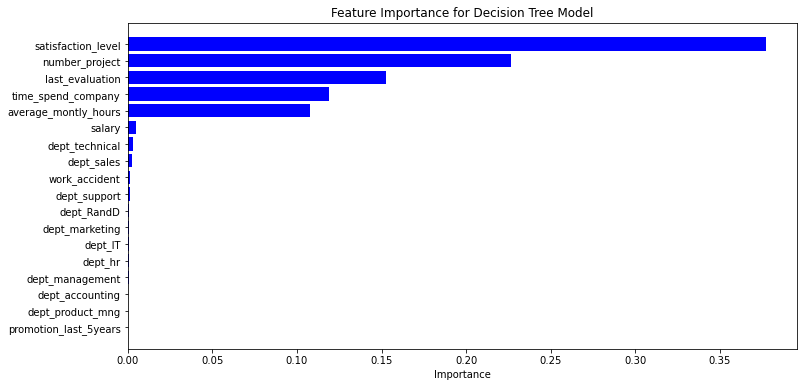

In [26]:
# Visualize:

# Sort feature importance in descending order
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'], color='blue')
plt.xlabel('Importance')
plt.title('Feature Importance for Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

#### Decision Tree Classifier (Tuned)

In [27]:
# Run iteration with only important features (>.10)

# Select the important features
important_features = [
    'satisfaction_level', 
    'number_project', 
    'last_evaluation', 
    'time_spend_company', 
    'average_montly_hours'
]

# Define the feature set and target variable using only important features
X_important = df_final[important_features]
y = df_final['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree model
important_log = DecisionTreeClassifier(random_state=42)
important_log.fit(X_train, y_train)

# Predict on the test set
y_pred = important_log.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9679032930387661
Confusion Matrix:
 [[1957   41]
 [  36  365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.90      0.91      0.90       401

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [28]:
# Tune this model iteration
# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [29]:
# Run the tuned model
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train the Decision Tree model with the best parameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9795748228428511
Confusion Matrix:
 [[1988   10]
 [  39  362]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1998
           1       0.97      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



### We now have a tuned model that uses the most important features and has a accuracy score of ~98%.

**Optional** : Check ensemble learning (RF)

In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.980408503543143
Random Forest Confusion Matrix:
 [[1990    8]
 [  39  362]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [34]:
# Calculate F1 score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest F1 Score:", f1_rf)

Random Forest F1 Score: 0.9800900488183767


In [36]:
# Check if data fits the model

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate mean and standard deviation of cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.98801459 0.98332465 0.98435871 0.98540146 0.98748697]
Mean CV Score: 0.9857172743233381
Standard Deviation of CV Scores: 0.0017932972020537922


In conclusion the RandomForest outperformed the other types of modeling for this use case.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






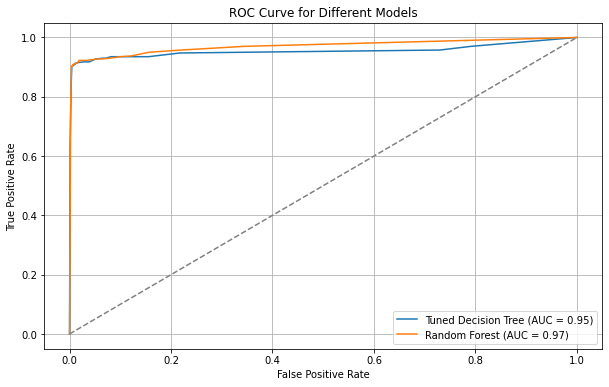

In [104]:
# Calculate probabilities for each model
y_probs_tuned_dt = best_dt_model.predict_proba(X_test[important_features])[:, 1]
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_tuned_dt, tpr_tuned_dt, _ = roc_curve(y_test, y_probs_tuned_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

auc_tuned_dt = roc_auc_score(y_test, y_probs_tuned_dt)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_tuned_dt, tpr_tuned_dt, label=f'Tuned Decision Tree (AUC = {auc_tuned_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Key insights: The random forest most accurately predicts whether an employee will leave.

Recommendations: Satisfaction levels and number of projects play large roles on whether or not employees leave. To my manager: "In the interest of maximizing employee retention I recommend instituting policies that promote better working conditions and limit over exertion project wise."

Model Improvment: Yes it can be improved, I can institute more parameters to the grid search, look into feature reduction further, dive deeper into ensemble learning to see if another model works better in this use-case. In the long run I can also train it on more data if I had access to it.

Other questions: What led to employees leaving? How does one feature influence the other? Which departments have the highest precentage? 

Ethical Considerations: Did the employees provide consent to us training a model on their info?


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Our best model was the RandomForest Classifier:

Model Metrics:
- Accuracy: 0.98
- Precision: 0.98
- Recall: 1.00
- F1 Score: 0.98
- Roc-Auc Score: 0.97

### Conclusion, Recommendations, Next Steps

In conclusion our model performs significantly well in predicting employee retention. With the goal of maximizing retention I recommend focusing on improving employee satisifaction. The next steps is to present this data to the senior stakeholders and move in their recommended direction in addressing the issue.